In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(9876789)

# OLS estimation

Artifitial data:

In [3]:
n_samples = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size = n_samples)

### Arbitrarily add and intercept column(column of 1s)

In [4]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

## Fit and summary

In [5]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.83e-239
Time:                        15:03:37   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.000       0.722       1.963
x1            -0.0402      0.145     -0.278      0.781      -0.327       0.247
x2            10.0103      0.014    715.745      0.000       9.982      10.038
==============================================================================
Omnibus:                        2.042   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.875
Skew:                           0.234   Prob(JB):                        0.392
Kurtosis:                       2.519   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Extract quantities

In [6]:
print(f"OLS parameters: {results.params}")
print(f"R square: {results.rsquared}")

OLS parameters: [ 1.34233516 -0.04024948 10.01025357]
R square: 0.9999879365025871


# OLS non-linear curve, but linear in parameters

In [7]:
n_samples = 50
sig = 0.5
x = np.linspace(0, 20, n_samples)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(n_samples)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X ,beta)
y = y_true + sig * np.random.normal(size = n_samples)

In [8]:
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 02 May 2024   Prob (F-statistic):           6.30e-27
Time:                        15:03:37   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.000       0.416       0.522
x2             0.4836      0.104      4.659      0.000       0.275       0.693
x3            -0.0174      0.002     -7.507      0.000      -0.022      -0.013
const          5.2058      0.171     30.405      0.000       4.861       5.550
==============================================================================
Omnibus:                        0.655   Durbin-Watson:                   2.896
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.360
Skew:                           0.207   Prob(JB):                        0.835
Kurtosis:                       3.026   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print("Prameters:", res.params)
print("Standard Errors:", res.bse)
print("Predicted values:\n", res.predict())

Prameters: [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard Errors: [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:
 [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


## Draw a plot
> Confidence intervals around the predictions are built using the "wls_prediction_std" command.

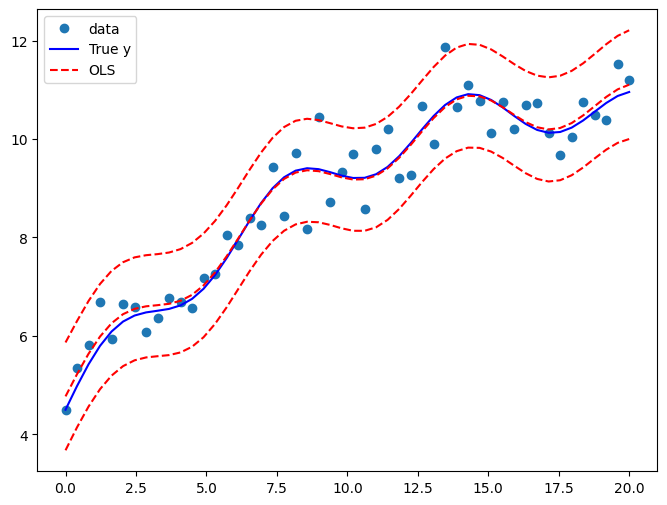

In [10]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(x, y, "o", label = "data")
ax.plot(x, y_true, "b-", label = "True y")
ax.plot(x, res.fittedvalues, "r--", label = "OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc = "best")

# OLS with dummy variables

In [11]:
n = 50
groups = np.zeros(n, int)
groups[20:40] = 1
groups[40:] = 2

dummy = pd.get_dummies(groups).values
x = np.linspace(0, 20, n)

# Drop reference category
X = np.column_stack((x, dummy[:, 1:]))
X = sm.add_constant(X, prepend = False)

beta = [1, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size = n)
y = y_true + e

In [12]:
pd.DataFrame({"x": X[:,0],
              "dummy1": X[:,1],
              "dummy2": X[:,2],
              "y": y}
            ).describe()

,x,dummy1,dummy2,y
count,50.000000,50.000000,50.000000,50.000000
mean,10.000000,0.400000,0.200000,20.613962
std,5.949951,0.494872,0.404061,5.960692
min,0.000000,0.000000,0.000000,9.282233
25%,5.000000,0.000000,0.000000,14.928072
50%,10.000000,0.000000,0.000000,22.356774
75%,15.000000,1.000000,0.000000,25.852375
max,20.000000,1.000000,1.000000,29.646338


In [13]:
pd.DataFrame({"x": X[:,0],
              "dummy": X[:,1],
              "dummy2": X[:,2],
              "y": y}
            ).head()

,x,dummy,dummy2,y
0,0.000000,0.0,0.0,9.282233
1,0.408163,0.0,0.0,10.504819
2,0.816327,0.0,0.0,11.843892
3,1.224490,0.0,0.0,10.385084
4,1.632653,0.0,0.0,12.379420


In [14]:
pd.DataFrame(dummy).head()

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [15]:
res2 = sm.OLS(y, X).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Thu, 02 May 2024   Prob (F-statistic):           5.69e-38
Time:                        15:03:37   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.000       0.879       1.121
x2             2.8909      0.569      5.081      0.000       1.746       4.036
x3            -3.2232      0.927     -3.477      0.001      -5.089      -1.357
const         10.1031      0.310     32.573      0.000       9.479      10.727
==============================================================================
Omnibus:                        2.831   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.927
Skew:                          -0.279   Prob(JB):                        0.382
Kurtosis:                       2.217   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

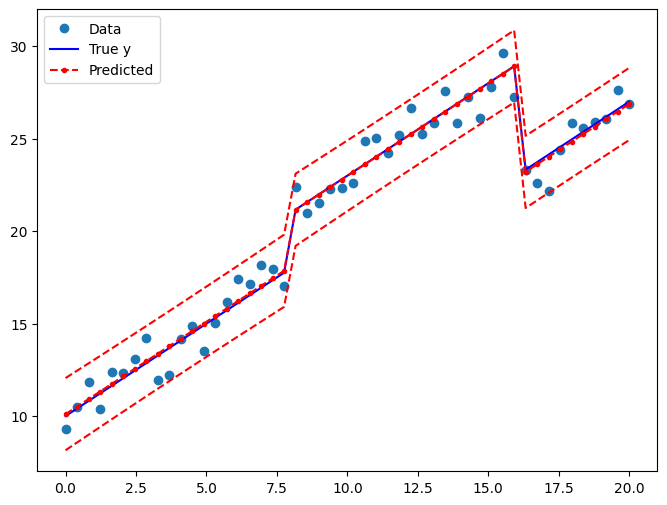

In [16]:
pred_ols2 = res2.get_prediction()
CI_lower = pred_ols2.summary_frame()["obs_ci_lower"]
CI_upper = pred_ols2.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(x, y, "o", label = "Data")
ax.plot(x, y_true, "b-", label = "True y")
ax.plot(x, res2.fittedvalues, "r--.", label = "Predicted")
ax.plot(x, CI_upper, "r--")
ax.plot(x, CI_lower, "r--")
legend = ax.legend(loc = "best")

## F test

In [17]:
R = [
    [0, 1, 0, 0],
    [0, 0, 1, 0]
]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=145.49268198028102, p=1.2834419617280512e-20, df_denom=46, df_num=2>


In [18]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=145.49268198028074, p=1.2834419617280974e-20, df_denom=46, df_num=2>


## Samller group effects

In [19]:
beta = [1, 0.3, -0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size = n)

res3 = sm.OLS(y,X).fit()

In [20]:
print(res3.f_test(R))

<F test: F=1.224911192540921, p=0.30318644106311926, df_denom=46, df_num=2>


In [21]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=1.2249111925409215, p=0.30318644106311926, df_denom=46, df_num=2>


In [22]:
res3.f_test("x1 = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=204.3064803728582, p=1.544731962023745e-18, df_denom=46, df_num=1>

# Multicollinearity
> The Longley dataset is well known to have high multicollinearity. <br>
That is, the exogenous predictors are highly correlated.
> <br>This is problematic because it can affect the stability of coefficient estimates.

In [23]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog

In [24]:
y.name

'TOTEMP'

In [25]:
X.describe()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,101.681250,387698.437500,3193.312500,2606.687500,117424.000000,1954.500000
std,10.791553,99394.937795,934.464247,695.919604,6956.101561,4.760952
min,83.000000,234289.000000,1870.000000,1456.000000,107608.000000,1947.000000
25%,94.525000,317881.000000,2348.250000,2298.000000,111788.500000,1950.750000
50%,100.600000,381427.000000,3143.500000,2717.500000,116803.500000,1954.500000
75%,111.250000,454085.500000,3842.500000,3060.750000,122304.000000,1958.250000
max,116.900000,554894.000000,4806.000000,3594.000000,130081.000000,1962.000000


In [26]:
X.columns

Index(['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR'], dtype='object')

In [27]:
import statsmodels.formula.api as smf
dat = pd.concat([X, y], axis = 1)

smf.ols("TOTEMP ~ GNPDEFL + GNP + UNEMP + ARMED + POP + YEAR",
        data = dat).fit().summary()

C:\Users\user\anaconda3\envs\notebook\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.98e-10
Time:                        15:03:38   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
GNPDEFL       15.0619     84.915      0.177      0.863    -177.029     207.153
GNP           -0.0358      0.033     -1.070      0.313      -0.112       0.040
UNEMP         -2.0202      0.488     -4.136      0.003      -3.125      -0.915
ARMED         -1.0332      0.214     -4.822      0.001      -1.518      -0.549
POP           -0.0511      0.226     -0.226      0.826      -0.563       0.460
YEAR        1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Condition number
> One way to assess multicollinearity is to compute the condition number. <br>
> Values over 20 are worrisome.<br>
> The first step is to normalize the indipendent variables to have unit length.

In [30]:
norm_x = X.values

for i, name in enumerate(X):
    if name == "const": 
        continue
    norm_x[:, i] = X[name] / np.linalg.norm(X[name])

norm_xtx = np.dot(norm_x.T, norm_x)
print(norm_xtx)

[[1.         0.98988128 0.97438017 0.97499386 0.99886091 0.99499773]
 [0.98988128 1.         0.97347171 0.96657635 0.98262563 0.97110798]
 [0.97438017 0.97347171 1.         0.91940178 0.97126392 0.96255219]
 [0.97499386 0.96657635 0.91940178 1.         0.97180982 0.9684195 ]
 [0.99886091 0.98262563 0.97126392 0.97180982 1.         0.99849054]
 [0.99499773 0.97110798 0.96255219 0.9684195  0.99849054 1.        ]]


> Then we take the square root of the ratio of the biggest to the smallest eigenvalues.

In [31]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
condition_number

1086.0170218672047